In [1]:
!ls

README.md            df_mod_raw.csv       travel insurance.csv
df_mod_final.csv     project.ipynb


In [2]:
import numpy as np
import pandas as pd
from collections import Counter

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# import geopandas

df = pd.read_csv("travel insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [3]:
Counter(df["Net Sales"]<0)

Counter({True: 678, False: 62648})

In [4]:
df.groupby("Destination").mean()["Net Sales"].sort_values(ascending= False).head(20)

Destination
TURKS AND CAICOS ISLANDS    128.000000
CAMEROON                    112.000000
GUATEMALA                   112.000000
SAMOA                       112.000000
TAJIKISTAN                  112.000000
PUERTO RICO                 106.666667
JAMAICA                     101.333333
TURKMENISTAN                 99.500000
CAYMAN ISLANDS               96.000000
FRENCH POLYNESIA             89.000000
KYRGYZSTAN                   85.333333
CYPRUS                       81.713333
VENEZUELA                    81.400000
SENEGAL                      80.000000
GUINEA-BISSAU                80.000000
SIERRA LEONE                 80.000000
DOMINICAN REPUBLIC           80.000000
ALBANIA                      80.000000
VIRGIN ISLANDS, U.S.         80.000000
BOTSWANA                     80.000000
Name: Net Sales, dtype: float64

In [5]:
df.groupby("Destination").mean()["Net Sales"].sort_values(ascending= False).tail(10)

Destination
MYANMAR                                   20.648511
BRUNEI DARUSSALAM                         18.644872
IRAN, ISLAMIC REPUBLIC OF                 14.026667
BARBADOS                                  14.000000
MOLDOVA, REPUBLIC OF                      14.000000
GUADELOUPE                                10.000000
BENIN                                     10.000000
ANGOLA                                     0.000000
ZAMBIA                                   -14.333333
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF   -26.000000
Name: Net Sales, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


/var/folders/j3/gl72gkvn01lf0phm29rwlwrw0000gn/T/ipykernel_7269/1073788948.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, loc='lower right',labels=product_cat.index,)


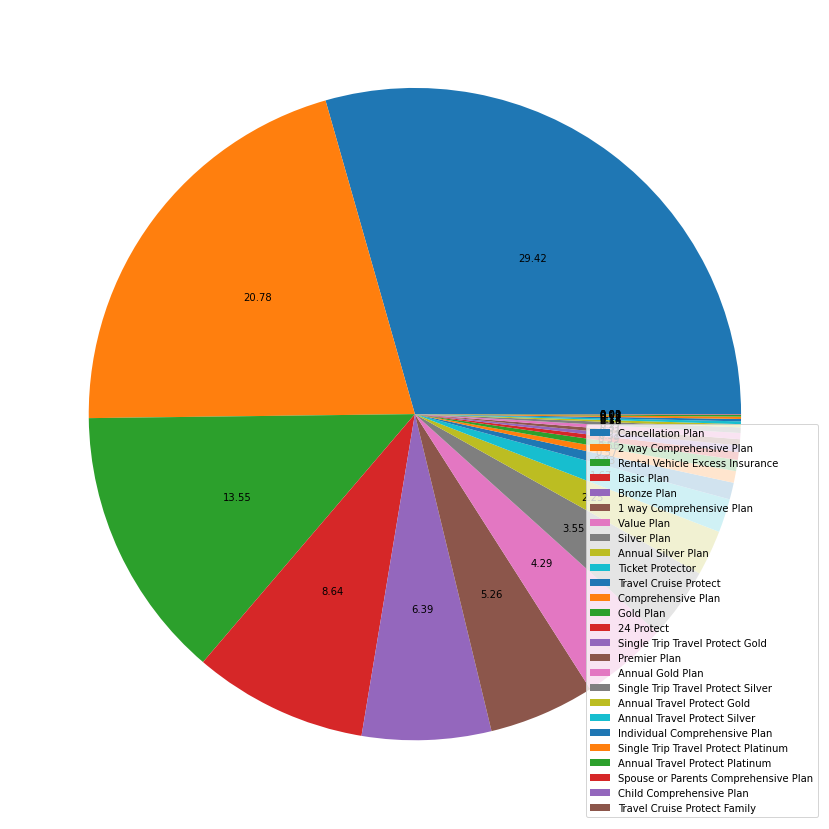

In [8]:
product_cat = df.groupby("Product Name").size().sort_values(ascending=False)

f, axes = plt.subplots(1,1, figsize=(20,15))
patches, text, _ = plt.pie(product_cat.values, autopct='%.02f')
plt.legend(patches, loc='lower right',labels=product_cat.index,)
plt.show()

/var/folders/j3/gl72gkvn01lf0phm29rwlwrw0000gn/T/ipykernel_7269/1567664424.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, loc='lower right',labels=product_cat.index,)


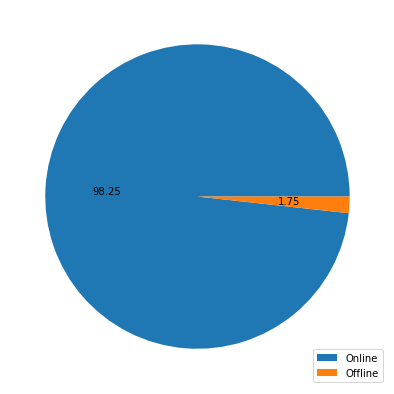

In [9]:
# df.groupby("Distribution Channel").size().plot.pie(figsize=(5, 5),subplots=True)

product_cat = df.groupby("Distribution Channel").size().sort_values(ascending=False)

f, axes = plt.subplots(1,1, figsize=(7,7))
patches, text, _ = plt.pie(product_cat.values, autopct='%.02f')
plt.legend(patches, loc='lower right',labels=product_cat.index,)
plt.show()

array([<AxesSubplot:ylabel='0'>], dtype=object)

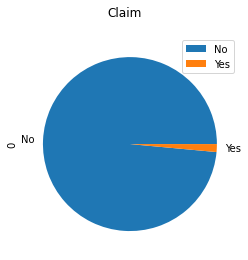

In [10]:
pd.DataFrame(df.groupby("Claim").size()).plot.pie(subplots=True,title ="Claim")

In [11]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>1090, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Popular Destinations among insured')
fig.show()

# gender


In [12]:
Counter(df["Gender"])

Counter({'F': 8872, nan: 45107, 'M': 9347})

In [13]:
df_mod = df.drop(columns=["Gender"])

In [14]:
df_mod.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [15]:
# 

In [16]:
df_mod["Age"].describe()

count    63326.000000
mean        39.969981
std         14.017010
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

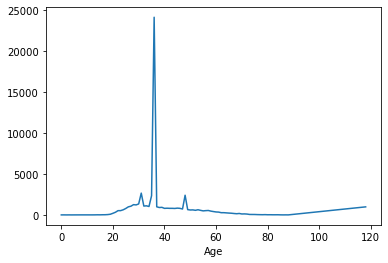

In [17]:
df_mod.groupby(["Age"]).size().plot()

In [18]:
# np.where(df_mod['Age']>=100, 99)

df_mod['Age'].mask(df_mod['Age'] >= 100, 99, inplace=True)

<AxesSubplot:xlabel='Age'>

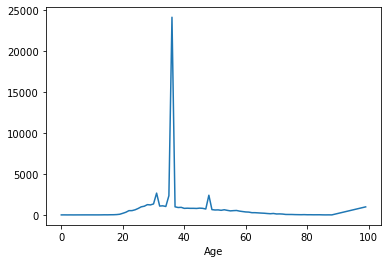

In [19]:
df_mod.groupby(["Age"]).size().plot()

In [20]:
df_mod["Duration"].describe()

count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

<AxesSubplot:xlabel='Duration'>

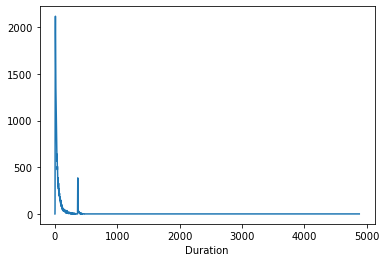

In [21]:
df_mod.groupby(["Duration"]).size().plot()

In [22]:
df_mod['Age'].mask(df_mod['Age'] <= 0, 10, inplace=True)

In [23]:
df_mod["Age"].describe()

count    63326.000000
mean        39.675062
std         12.486074
min          1.000000
25%         35.000000
50%         36.000000
75%         43.000000
max         99.000000
Name: Age, dtype: float64

In [24]:
df_mod["Duration"] = [ i//24+1 for i in df_mod["Duration"]]

In [25]:
df_mod1 = df_mod.drop(columns="Age")

In [26]:
df_mod1

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value)
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,8,MALAYSIA,-29.0,9.57
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,8,MALAYSIA,-29.0,9.57
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,3,AUSTRALIA,-49.5,29.70
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,3,AUSTRALIA,-39.6,23.76
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,4,ITALY,-19.8,11.88
...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,5,JAPAN,35.0,12.25
63322,JZI,Airlines,Online,Basic Plan,No,3,CHINA,40.0,14.00
63323,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,18.0,6.30
63324,JZI,Airlines,Online,Basic Plan,No,1,VIET NAM,18.0,6.30


# Preprocess

In [27]:
from sklearn import preprocessing
# label_encoder1 = preprocessing.OneHotEncoder()

In [103]:
df_final = pd.get_dummies(df_mod1,columns= ["Agency","Claim","Destination","Product Name","Distribution Channel","Agency Type"])

In [104]:
df_final.head()

,Duration,Net Sales,Commision (in value),Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Distribution Channel_Offline,Distribution Channel_Online,Agency Type_Airlines,Agency Type_Travel Agency
0,8,-29.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,8,-29.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,-49.5,29.70,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,3,-39.6,23.76,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,4,-19.8,11.88,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [30]:
df_final.to_csv("df_mod_final.csv")

In [31]:
df_mod1.to_csv("df_mod_raw.csv")

In [168]:
##Feature Selection

In [48]:
#
#
from sklearn.decomposition import PCA

In [144]:
df_final[df_final < 0] = 0
df_final.head()

,Duration,Net Sales,Commision (in value),Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Distribution Channel_Offline,Distribution Channel_Online,Agency Type_Airlines,Agency Type_Travel Agency
0,8,0.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,8,0.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0.0,29.70,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,3,0.0,23.76,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,4,0.0,11.88,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [145]:
col = df_final.columns       # .columns gives columns names in data 
print(col)

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Agency_ADM',
       'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR',
       'Agency_CWT',
       ...
       'Product Name_Single Trip Travel Protect Silver',
       'Product Name_Spouse or Parents Comprehensive Plan',
       'Product Name_Ticket Protector', 'Product Name_Travel Cruise Protect',
       'Product Name_Travel Cruise Protect Family', 'Product Name_Value Plan',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Agency Type_Airlines', 'Agency Type_Travel Agency'],
      dtype='object', length=200)


In [146]:
y = df_final.Claim_Yes 
list = ['Claim_Yes','Claim_No']
x = df_final.drop(list,axis = 1 )
x.head()

,Duration,Net Sales,Commision (in value),Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Distribution Channel_Offline,Distribution Channel_Online,Agency Type_Airlines,Agency Type_Travel Agency
0,8,0.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,8,0.0,9.57,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0.0,29.70,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,3,0.0,23.76,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,4,0.0,11.88,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [147]:
x.describe()

,Duration,Net Sales,Commision (in value),Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Distribution Channel_Offline,Distribution Channel_Online,Agency Type_Airlines,Agency Type_Travel Agency
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,...,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,2.624688,41.354641,9.809992,0.001295,0.005227,0.130547,0.001595,0.003064,0.001358,0.135489,...,0.002732,0.000237,0.016676,0.008322,0.000016,0.042873,0.017481,0.982519,0.275669,0.724331
std,4.239973,47.573420,19.804388,0.035962,0.072109,0.336907,0.039905,0.055265,0.036827,0.342248,...,0.052197,0.015389,0.128054,0.090845,0.003974,0.202573,0.131056,0.131056,0.446854,0.446854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,26.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,48.000000,11.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,204.000000,810.000000,283.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of Policies with Claims:  62399
Number of Policies without Claims :  927


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



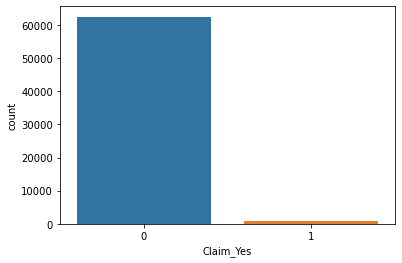

In [148]:
ax = sns.countplot(y,label="Count")      
N, C = y.value_counts()
print('Number of Policies with Claims: ',N)
print('Number of Policies without Claims : ',C)

<AxesSubplot:>

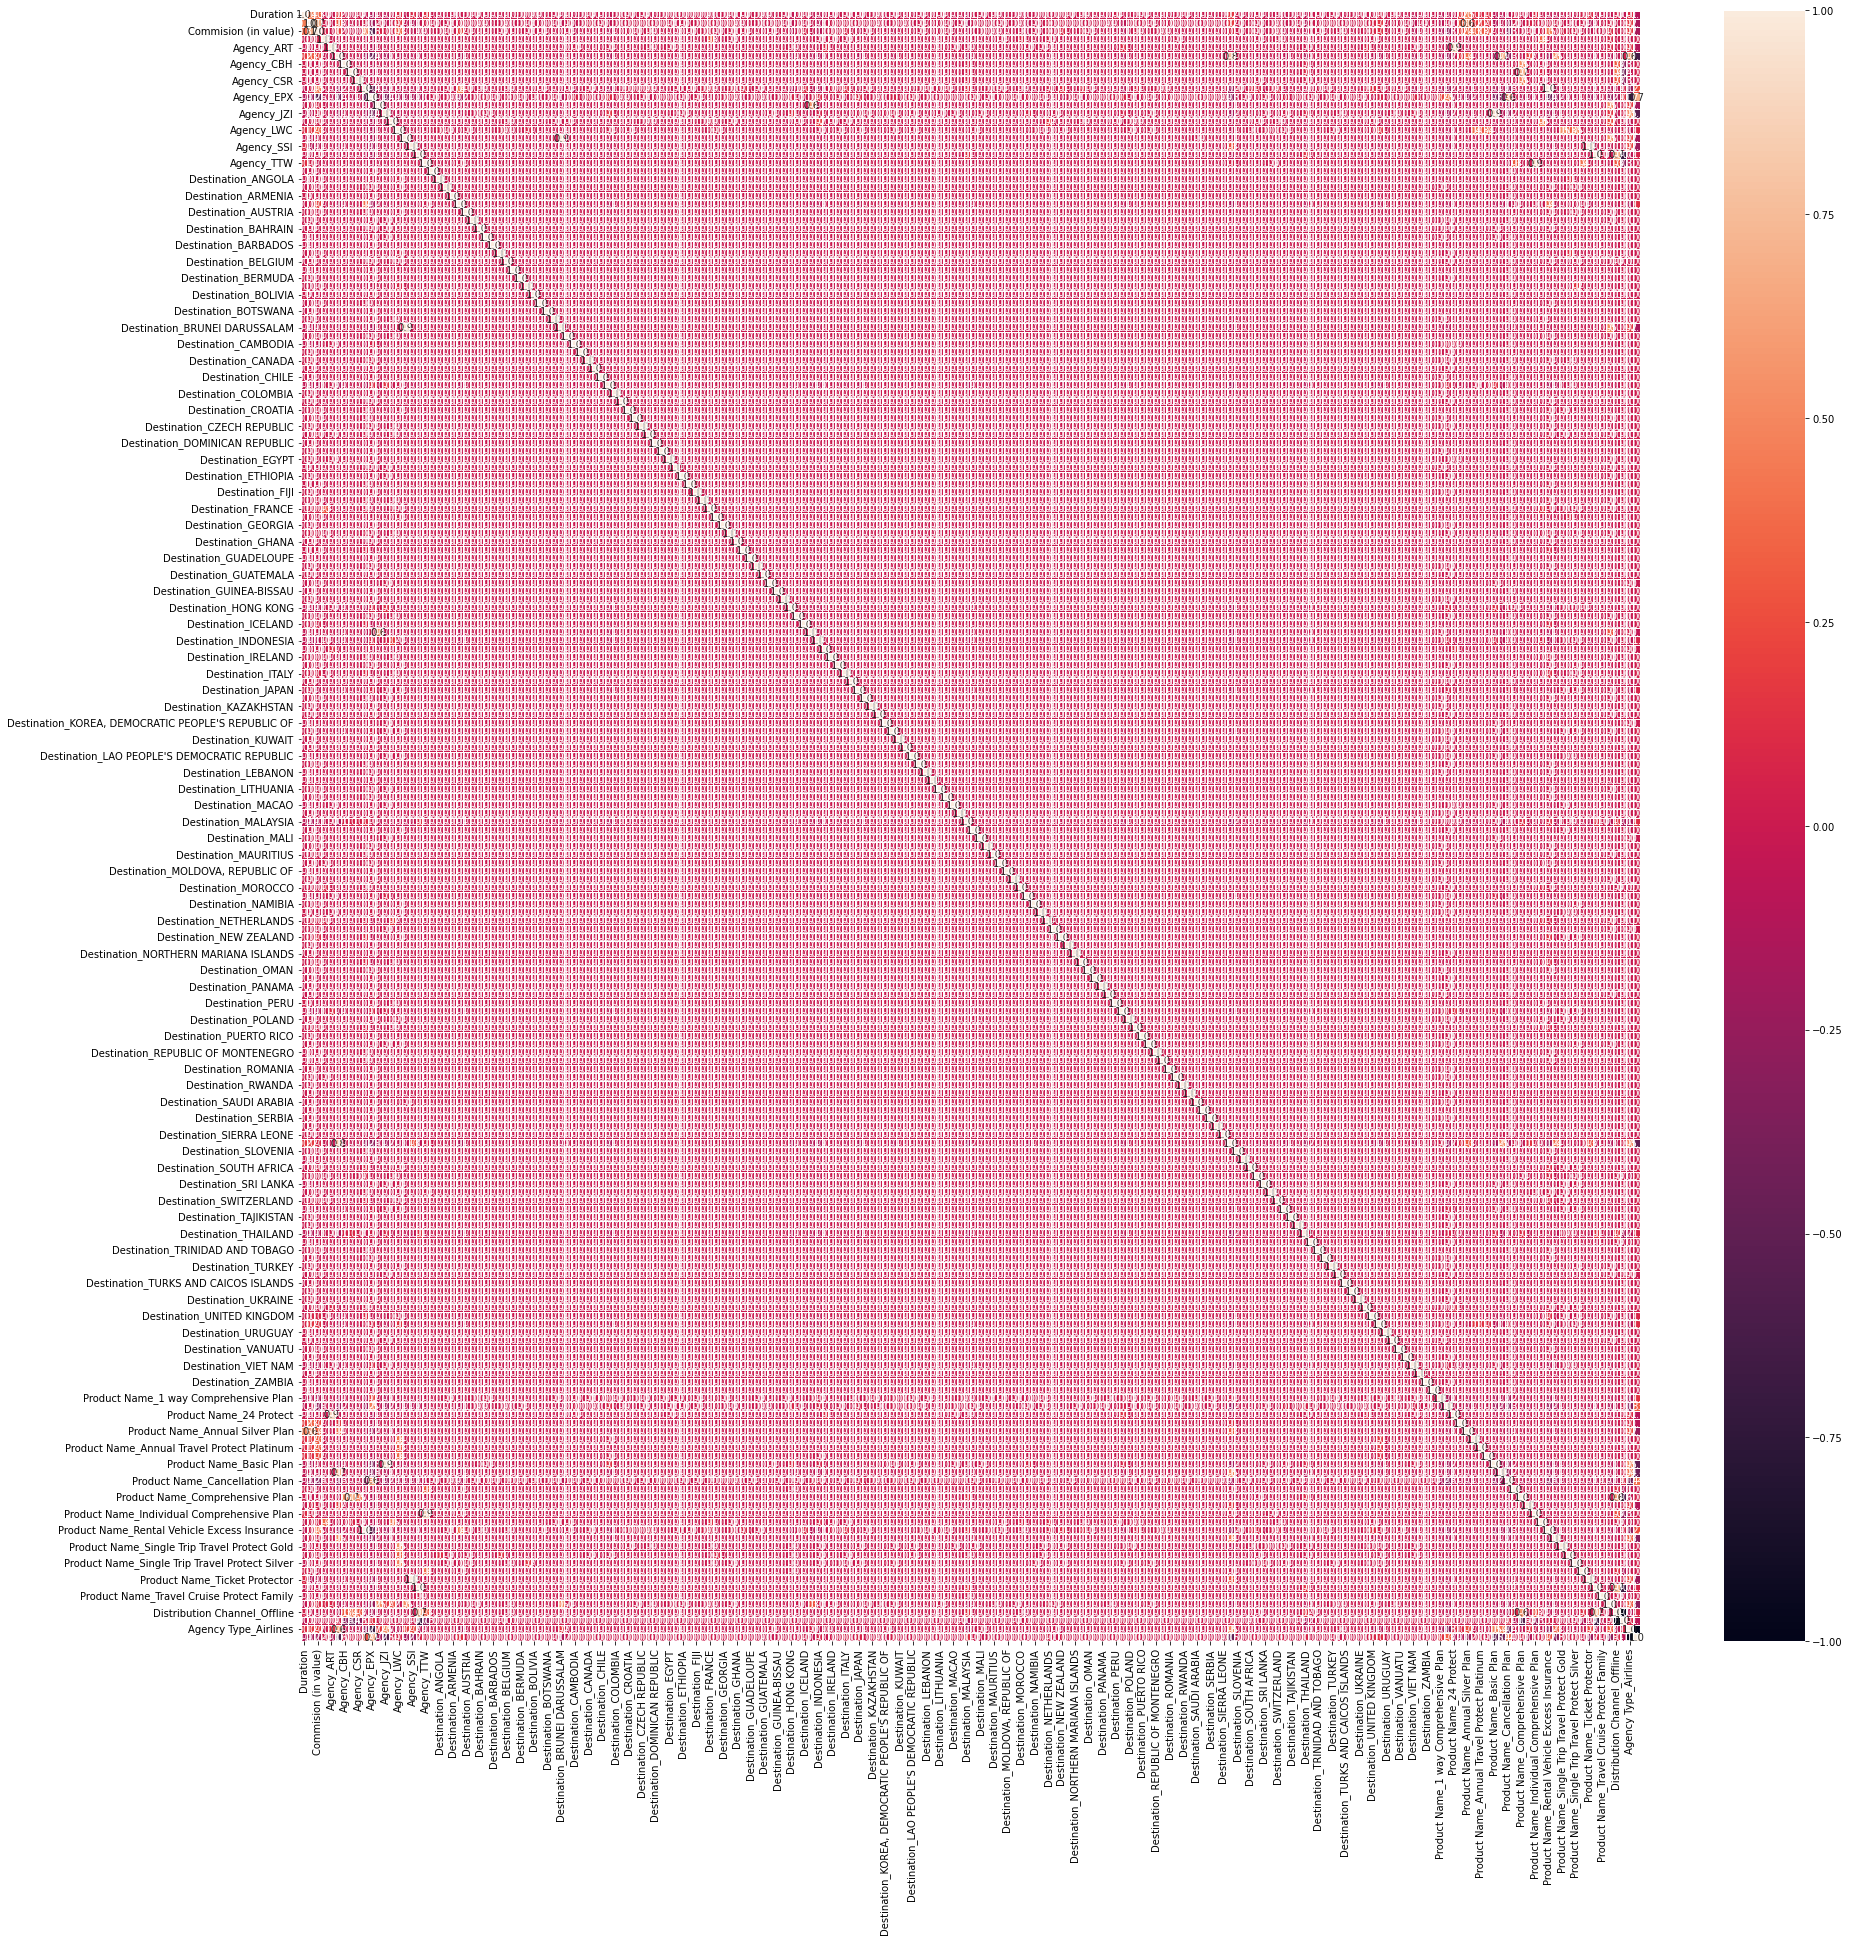

In [149]:
#correlation map
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Int64Index([   21,    22,    23,    24,    25,    26,    27,    28,    29,
               30,
            ...
            63316, 63317, 63318, 63319, 63320, 63321, 63322, 63323, 63324,
            63325],
           dtype='int64', length=60764)

In [151]:

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [152]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Accuracy is:  0.9822612906621749


<AxesSubplot:>

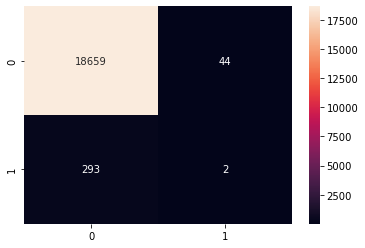

In [153]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=50).fit(x_train, y_train)

In [159]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.62120870e+03 4.27265245e+04 1.64729368e+04 8.09959722e-01
 3.34108385e+00 1.07001824e+03 9.25668253e-01 5.88964645e-01
 5.16344472e-02 9.66228293e+00 1.39850374e+02 2.66577958e+00
 2.78730190e+01 1.00647641e+00 4.14893749e+01 7.44873673e+00
 2.99592961e+00 2.02579184e+00 8.14851582e+00            nan
            nan 2.02489930e-01 1.44635665e-02 4.68270683e+00
 1.05584035e+00 1.01244965e-01 1.30172098e-01 8.53350421e-01
 1.44635665e-02 2.89271329e-02 5.20688393e-01            nan
 1.44635665e-02 4.33906994e-02 4.33906994e-02 1.44635665e-02
 1.44635665e-02 3.61589161e-01 7.94049799e+00 1.01244965e-01
 3.09796106e+00 1.44635665e-02 8.10302157e-02 1.44635665e-02
 1.30172098e-01 1.12679703e+01 1.30172098e-01 7.23178323e-02
 5.49615525e-01 1.73562798e-01 2.16761304e+00 1.07030392e+00
            nan 8.67813988e-02 2.16953497e-01 7.23178323e-02
 4.33906994e-02 2.89271329e-02 1.73562798e-01 8.96741120e-01
 6.70069906e-02 1.44635665e-02 1.44635665e-01 1.07144961e-01
 7.23178323e

Accuracy is:  0.9825771133803558


<AxesSubplot:>

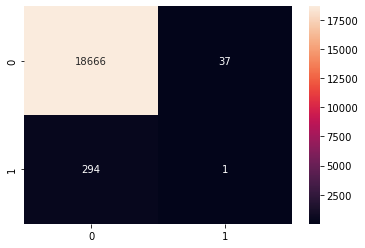

In [160]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [161]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [162]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Duration', 'Net Sales', 'Commision (in value)', 'Agency_C2B',
       'Destination_SINGAPORE'],
      dtype='object')


In [163]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but RFECV was fitted with feature names



Optimal number of features : 2
Best features : Index(['Net Sales', 'Commision (in value)'], dtype='object')
